### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Creating the Data Frame

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

### Exploring the Data

In [8]:
data.shape

(12684, 26)

In [9]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [10]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [11]:
data.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [12]:
data.sample(30)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8807,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),2h,Male,36,Married partner,...,never,less1,1~3,1~3,1,1,0,0,1,1
3641,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,1~3,1~3,less1,1,1,1,0,1,1
6156,Home,Alone,Sunny,80,6PM,Coffee House,1d,Male,46,Married partner,...,never,less1,4~8,1~3,1,0,0,0,1,0
10129,Home,Alone,Sunny,80,6PM,Restaurant(<20),1d,Female,26,Married partner,...,never,1~3,4~8,less1,1,0,0,1,0,1
5022,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,31,Married partner,...,never,1~3,gt8,1~3,1,0,0,1,0,0
8178,No Urgent Place,Partner,Rainy,55,2PM,Restaurant(<20),2h,Female,46,Married partner,...,4~8,4~8,1~3,less1,1,1,0,0,1,1
582,Home,Alone,Sunny,80,6PM,Coffee House,2h,Male,31,Single,...,gt8,gt8,1~3,less1,1,0,0,0,1,1
973,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,36,Married partner,...,less1,1~3,4~8,less1,1,1,0,0,1,1
3365,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,26,Single,...,never,4~8,1~3,never,1,1,0,0,1,1
9377,Work,Alone,Sunny,80,7AM,Restaurant(<20),1d,Male,below21,Single,...,never,never,less1,less1,1,0,0,0,1,1


Interestingly, I have 25 unique variables for occupation.

In [13]:
data.nunique(axis=0)

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

This gives me an overall structure of the data. I have 12684 observations and 26 features. Of the 26 features, 18 are categorical(object) and 8 are numeric(int64). I understand all the column names and I agree with their data types, however, I have reservations that time, age, and income are classified as objects and that has_children and temperature are classified as an int64 when the data appears to be categorical but I will first see how it affects my data analysis before I make any changes to the data type. I see missing values in the car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, and Restaurant20to50 categories and will investigate this further. The column "passagner" is misspelled and I will rename it to "passenger."

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

3. Decide what to do about your missing data -- drop, replace, other...

The output below displays the total sum of missing values the dataset has for each feature. The car feature is missing 12576 values and, therefore, I will simply remove this entire row of data because it will not be useful during the data analysis. The other categories are missing a small amount of rows by comparison and since the data type is categorical, I will also remove them from the data set since I cannot replace them with a mean or median value.

In [15]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [16]:
data2 = data.drop(labels = "car", axis = 1, inplace = False)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [17]:
data3 = data2.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
data3.info()
data3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [18]:
data4 = data3.astype({"has_children": object})
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  object
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [61]:
data5 = data4.rename(columns = {'passanger':'passenger'})
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  object
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

I now have 12079 observations with no missing data, has_children has been converted to an object data type, and the spelling error for passenger has been corrected. I will now investigate the remaining data to assess if there is any problematic or outlier data. It appears that with exception of temperature all of the numeric data have binary values of 0 and 1. However, temperature only has 3 distince values and the data type may need to be converted later during the data analysis.

In [62]:
data5.describe()

,temperature,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


The summary statistics above gives me a cursory glance at the numeric values. The mean, standard deviation, minimum, maximum, and quarteriles all appear to be reasonable at the outset. This also reinforces that there are no missing values due to all the counts = 12079. Since all of this data is binary (0 or 1) with the exception of temperature (which only has 3 values), I did not expect to find any outlier. No errors are noted.

In [63]:
data5.describe(include=object)

,destination,passenger,weather,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079,12079
unique,3,4,3,5,5,2,2,8,5,2,6,25,9,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,0,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1
freq,5970,6969,9601,3078,3816,6760,6199,2537,4831,7145,4219,1814,1919,4934,3298,4502,5163,5859


The summary statistics above gives me a cursory glance at the categorical values. The majority of the features have 5 or less categories. Occupation has 25 unique categories. The most represented category is the sunny category within the weather feature. All of this data appears appropriate with no obvious errors. However, it does demonstrate that some features may be unbalanced such as weather.

# Data Visualization

I will now visualize both the numeric and objective data types.

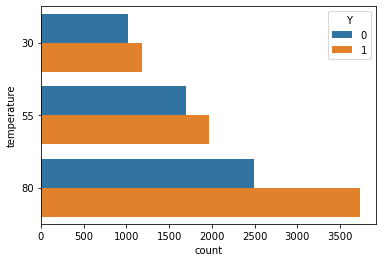

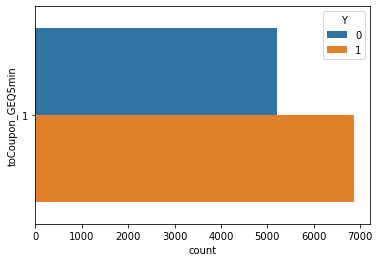

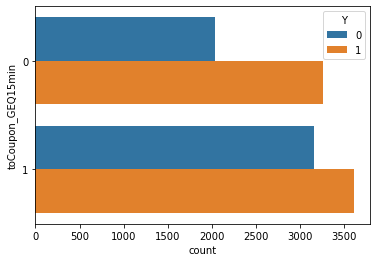

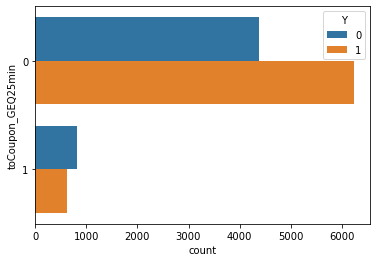

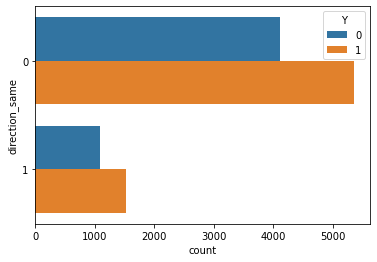

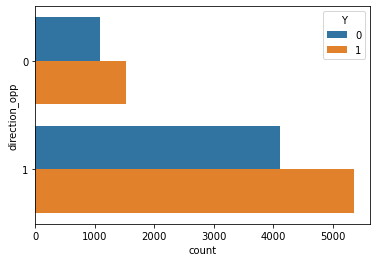

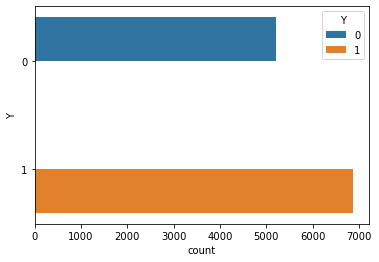

In [76]:
for col in data5.select_dtypes(include='int64').columns:
    plt.figure()
    sns.countplot(data=data4, y=col, hue='Y')

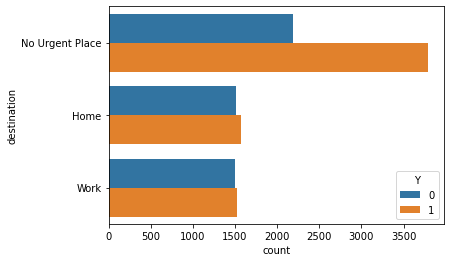

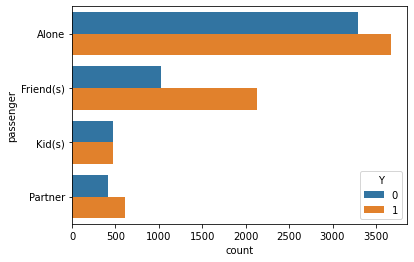

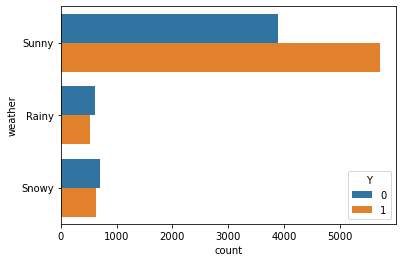

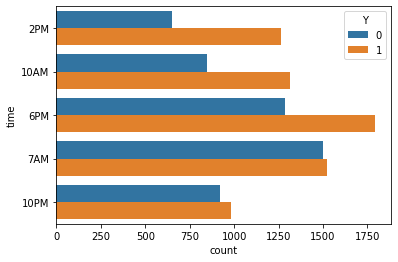

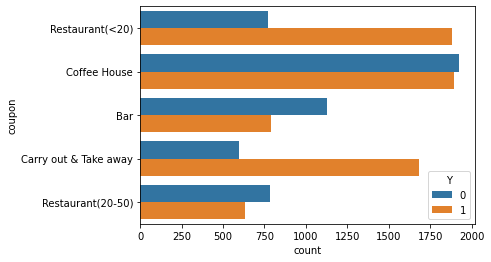

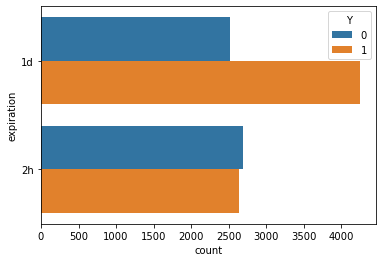

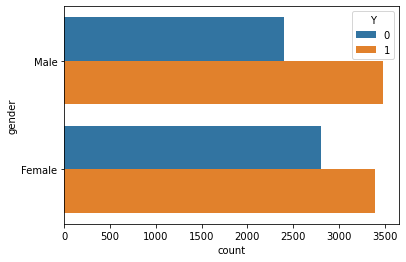

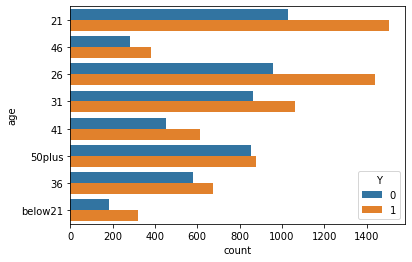

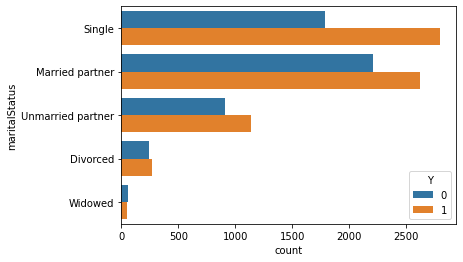

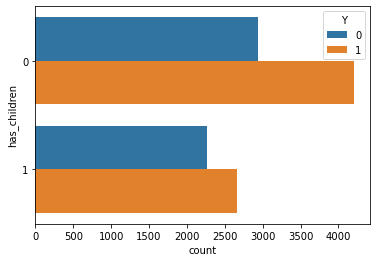

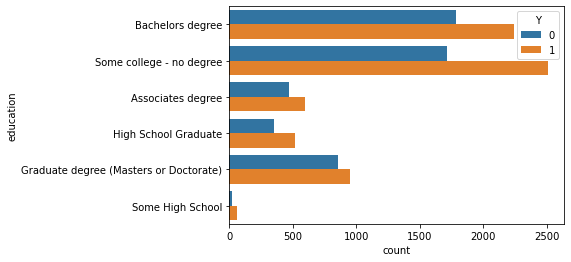

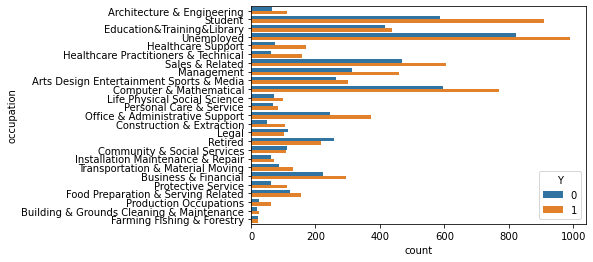

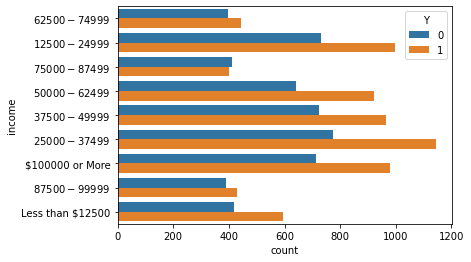

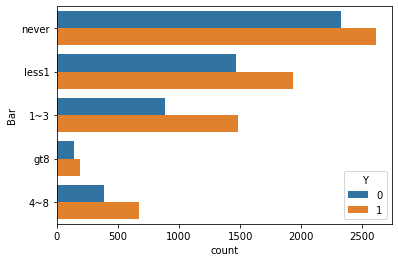

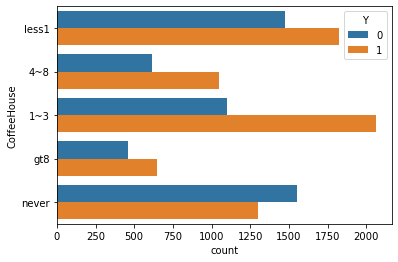

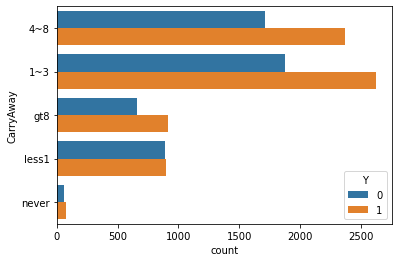

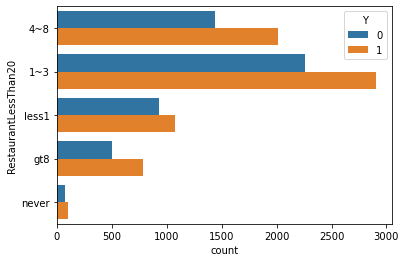

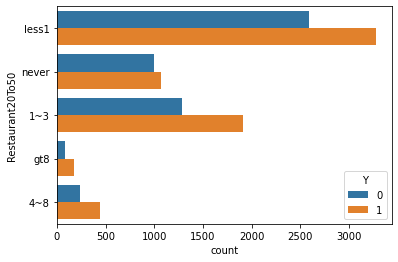

In [77]:
for col in data5.select_dtypes(include='object').columns:
    plt.figure()
    sns.countplot(data=data5, y=col, hue='Y')

No problematic data structrues are encountered. However, some numerical and categorical variables are unbalanced such as toCoupon_GEQ25min, direction_same, direction_opp, weather, destination, and possibly passenger.

4. What proportion of the total observations chose to accept the coupon? 



The total number of observations that chose to accept the coupon is 6877. The total number of observations is 12079. Therefore, the proportion of the total observations that chose to accept the coupon is 56.9%

In [78]:
data5.Y.value_counts().sort_index()

0    5202
1    6877
Name: Y, dtype: int64

In [79]:
x = 6877/12079
x

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

The bar plot below yields that there was considerable success (more than double) with coupons that were for "Restaurants(<20)" and "Carry out & Take away" categories. "Bar" and "Restaurant(20-50)" categories did not perform as well but did produce sales.

<AxesSubplot:xlabel='count', ylabel='coupon'>

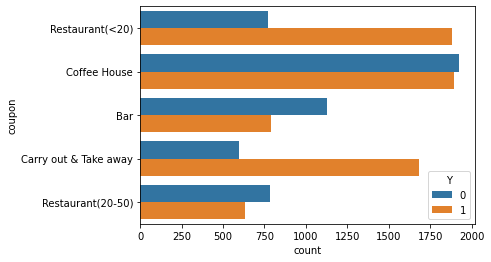

In [80]:
sns.countplot(data=data4, y='coupon', hue='Y')

6. Use a histogram to visualize the temperature column.

The histograms and barplots below demonstrate that for each temperature category 30F, 55F, 80F there were more accepted coupons vs rejected coupons. This effect was more pronounced at 80F.

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

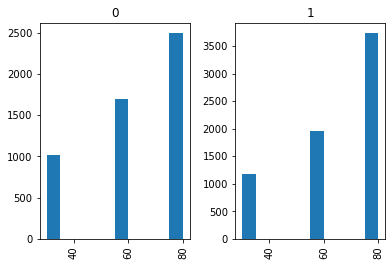

In [81]:
data5.hist(column = 'temperature', by = 'Y', grid = True)

<AxesSubplot:xlabel='count', ylabel='temperature'>

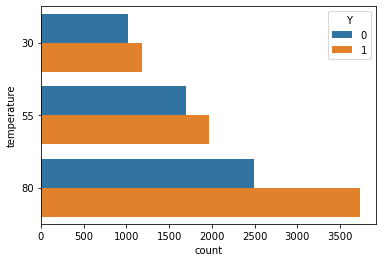

In [82]:
sns.countplot(data=data5, y='temperature', hue='Y')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [83]:
data_bar = data5[(data5['coupon']=='Bar')]
data_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passenger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   object
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

In [84]:
data_bar.shape

(1913, 25)

In [85]:
data_bar.sample(50)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
650,Work,Alone,Sunny,55,7AM,Bar,1d,Female,41,Single,...,1~3,1~3,1~3,never,1,1,1,0,1,1
9715,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,46,Single,...,1~3,gt8,4~8,1~3,1,0,0,0,1,1
6926,Home,Alone,Sunny,80,6PM,Bar,2h,Male,31,Unmarried partner,...,1~3,1~3,4~8,less1,1,0,0,1,0,1
11502,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,below21,Single,...,1~3,less1,4~8,gt8,1,1,0,0,1,0
11879,Home,Partner,Sunny,30,10PM,Bar,2h,Female,21,Married partner,...,1~3,4~8,1~3,never,1,1,1,0,1,0
5053,Home,Alone,Sunny,80,10PM,Bar,1d,Male,21,Single,...,1~3,gt8,gt8,1~3,1,1,0,1,0,1
9308,Work,Alone,Sunny,30,7AM,Bar,1d,Male,below21,Single,...,less1,1~3,4~8,4~8,1,1,0,1,0,0
2090,Work,Alone,Sunny,55,7AM,Bar,1d,Female,36,Divorced,...,gt8,gt8,gt8,1~3,1,1,1,0,1,0
1113,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,...,less1,4~8,1~3,less1,1,0,0,1,0,0
1185,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Married partner,...,gt8,4~8,gt8,4~8,1,0,0,1,0,1


In [87]:
data_bar.keys()

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

2. What proportion of bar coupons were accepted?


The total number of observations within the bar coupon category is 1913. The total number of observations within the bar category that accepted the coupon is 788. Therefore, the proportion of the bar coupons that chose to accept the coupon is 41.2%

In [89]:
data_bar.Y.value_counts().sort_index()

0    1125
1     788
Name: Y, dtype: int64

In [90]:
y=788/1913
y

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


The acceptance rate for those who went to a bar 3 or fewer times a month to those who went more is 641/1720 vs. 147/193 or 37.3% vs. 76.2%, respectively.

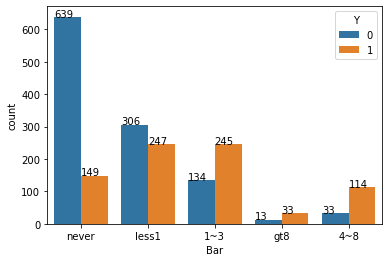

In [91]:
ax = sns.countplot(data=data_bar, x='Bar', hue='Y')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

In [92]:
data_bar.Bar.value_counts()

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64

In [93]:
total_less_than_3 = 788+553+379
total_more_than_3 = 147+46
print(total_less_than_3, total_more_than_3)

1720 193


In [94]:
data_bar_yes = data_bar[(data_bar.Y == 1)]
data_bar_yes.Bar.value_counts()

less1    247
1~3      245
never    149
4~8      114
gt8       33
Name: Bar, dtype: int64

In [95]:
yes_less_than_3 = 149+247+245
yes_more_than_3 = 33+114
print(yes_less_than_3, yes_more_than_3)

641 147


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is 278/403 = 0.6898 or 69% vs. 510/1510 = 0.3377 or 33.8% acceptance rate of all the others.

In [96]:
data_bar.age.value_counts()

21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: age, dtype: int64

In [138]:
data_bar_over25 = data_bar.drop(data_bar[data_bar.age.isin(['21', 'below21'])].index)
data_bar_over25.age.value_counts()

26        368
31        324
50plus    273
36        196
41        171
46        103
Name: age, dtype: int64

In [141]:
data_over25_more1 = data_over25_more1.drop(data_over25_more1[data_over25_more1['Bar'] == ('less1')].index)
data_over25_more1.Bar.value_counts()

1~3    270
4~8    103
gt8     30
Name: Bar, dtype: int64

In [140]:
data_over25_more1.value_counts().sum()

403

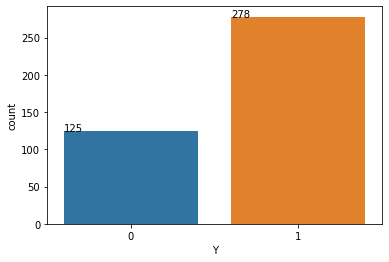

In [102]:
ax = sns.countplot(data=data_over25_more1, x = 'Y')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

To find out the acceptance rate from all the other categories with the bar coupon category, I would remove 125 "no" and 278 "yes" from the original bar coupon dataset. Therefore, 1125-125 = 1000 are "No" and 788-278 = 510 are "Yes". The total of all the other categories is 1000+510 = 1510 and the acceptance rate is 510/1510 = 33.8%

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [131]:
data_bar_more1 = data_bar.drop(data_bar[data_bar.Bar.isin(['never', 'less1'])].index)
data_bar_more1.Bar.value_counts()

1~3    379
4~8    147
gt8     46
Name: Bar, dtype: int64

In [132]:
data_bar_more1_nokid = data_bar_more1.drop(data_bar_more1[data_bar_more1['passenger'] == ('Kid(s)')].index)
data_bar_more1_nokid.passenger.value_counts()

Alone        341
Friend(s)    116
Partner       73
Name: passenger, dtype: int64

In [133]:
data_bar_more1_nokid_noFFF = data_bar_more1_nokid.drop(data_bar_more1_nokid[data_bar_more1_nokid['occupation'] == ('Farming Fishing & Foresty')].index)
data_bar_more1_nokid_noFFF.occupation.value_counts()

Unemployed                                   71
Student                                      64
Sales & Related                              61
Computer & Mathematical                      47
Management                                   43
Office & Administrative Support              39
Business & Financial                         25
Arts Design Entertainment Sports & Media     22
Education&Training&Library                   20
Legal                                        17
Protective Service                           14
Healthcare Practitioners & Technical         14
Food Preparation & Serving Related           14
Transportation & Material Moving             13
Healthcare Support                           11
Production Occupations                       10
Installation Maintenance & Repair             9
Personal Care & Service                       8
Construction & Extraction                     7
Architecture & Engineering                    6
Community & Social Services             

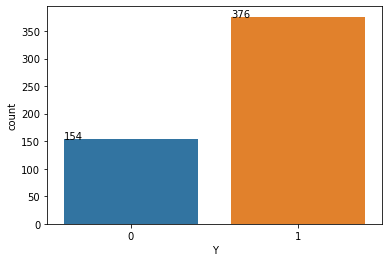

In [108]:
ax = sns.countplot(data=data_bar_more1_nokid_noFFF, x = 'Y')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 376/(154+376) = 70.9%

In [110]:
376/(154+376)

0.7094339622641509

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [111]:
data_bar_more1_nokid_nowid = data_bar_more1_nokid.drop(data_bar_more1_nokid[data_bar_more1_nokid['maritalStatus'] == ('Widowed')].index, inplace = False)
data_bar_more1_nokid_nowid.maritalStatus.value_counts()

Single               267
Married partner      128
Unmarried partner    122
Divorced              13
Name: maritalStatus, dtype: int64

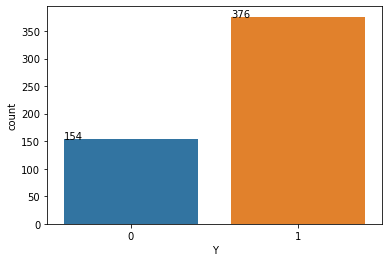

In [112]:
ax = sns.countplot(data=data_bar_more1_nokid_nowid, x = 'Y')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

The acceptance rate between drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 376/(154+376) = 70.9%

In [113]:
376/(154+376)

0.7094339622641509

In [127]:
data_bar_more1_under30 = data_bar_more1.drop(data_bar_more1[data_bar_more1.age.isin(['31', '50plus', '36', '41', '46'])].index)
data_bar_more1_under30.age.value_counts()

21         159
26         159
below21     10
Name: age, dtype: int64

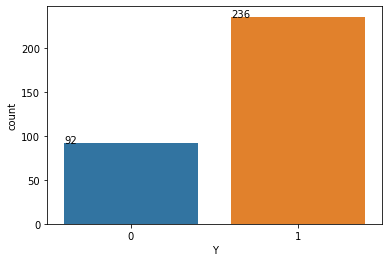

In [142]:
ax = sns.countplot(data=data_bar_more1_under30, x = 'Y')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

The acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is 236/(236+92) = 72.0%

In [143]:
236/(236+92)

0.7195121951219512

In [144]:
data_bar_cheapmore4=data_bar.drop(data_bar[data_bar.RestaurantLessThan20.isin(['never', 'less1', '1~3'])].index)
data_bar_cheapmore4.RestaurantLessThan20.value_counts()

4~8    548
gt8    186
Name: RestaurantLessThan20, dtype: int64

In [146]:
data_bar_cheapmore4_less50k=data_bar_cheapmore4.drop(data_bar_cheapmore4[data_bar_cheapmore4.income.isin(['$100000 or More', '$50000 - $62499', '$62500 - $74999', '$87500 - $99999', '$75000 - $87499'])].index)
data_bar_cheapmore4_less50k.income.value_counts()

$12500 - $24999     96
$37500 - $49999     90
$25000 - $37499     74
Less than $12500    73
Name: income, dtype: int64

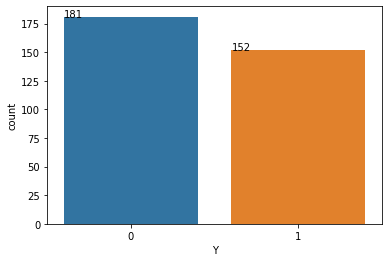

In [147]:
ax = sns.countplot(data=data_bar_cheapmore4_less50k, x = 'Y')
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

The acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 152/(181+152) = 45.6%

In [148]:
152/(181+152)

0.45645645645645644

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The overall proportion of bar coupons that drivers chose to accept is 41.2%. This approximates the acceptance rate of drivers who go to restauratns that cost less than $20 more than 4 times a month and whose income is less than 50k. However, the acceptance rate for drivers who go to a bar more than once a month and are over the age of 25 is 69 percent; the acceptance rate for drivers who go to a bar 3 or more times a month is 76.2 percent; the acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry is 70.9 percent; the acceptance rate between drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 70.9 percent; the acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is 72.0 percent. The data supports the hypothesis that past behavior of frequenting a bar more than once a month has a strong predictive effect on whether the driver will accept to use a bar coupon to the exclusion of all others features. This hypothesis will need to be further tested to confirm its validity and generizability to future data samples.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

The chart below demonstrates that "Restaurant(<20)", "Coffee House", and "Carry out & Take away" had the highest amount of drivers that reported an acceptance of "yes". However, what is most interesting to me is that the acceptance rate of the "Restaurant(<20)" category is 70.9% but the acceptance rate of "Restaurant(20-50)" is 44.6%. This represents an acceptance rate that is nearly 1.6 times greater for the former category. Can the data set explain this variance in acceptance rate for these two different categories? Let us see what a focused exploratory data analysis can produce.

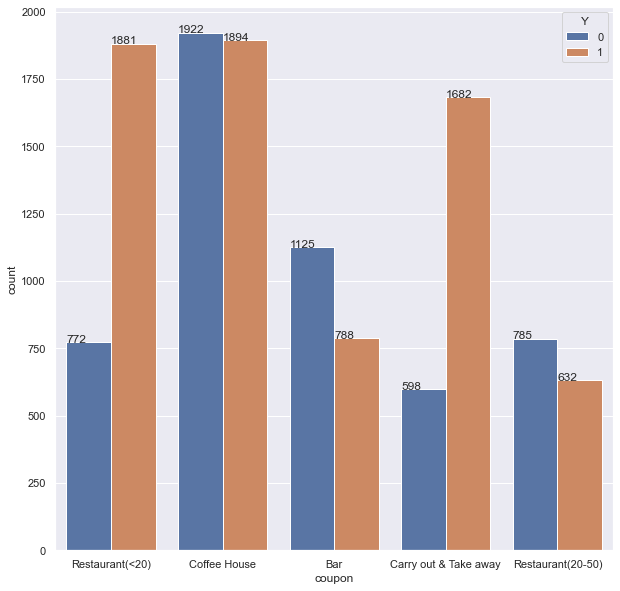

In [163]:
ax = sns.countplot(data=data5, x='coupon', hue='Y')
sns.set(rc={'figure.figsize':(10,10)})
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()))

First I will create two new data frames one consisting of only restaurants with coupons for less than $20 and one consisting of only restaurants between $20-$50.

In [208]:
df = data5[(data5['coupon']=='Restaurant(<20)')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653 entries, 22 to 12678
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2653 non-null   object
 1   passenger             2653 non-null   object
 2   weather               2653 non-null   object
 3   temperature           2653 non-null   int64 
 4   time                  2653 non-null   object
 5   coupon                2653 non-null   object
 6   expiration            2653 non-null   object
 7   gender                2653 non-null   object
 8   age                   2653 non-null   object
 9   maritalStatus         2653 non-null   object
 10  has_children          2653 non-null   object
 11  education             2653 non-null   object
 12  occupation            2653 non-null   object
 13  income                2653 non-null   object
 14  Bar                   2653 non-null   object
 15  CoffeeHouse           2653 non-null 

In [211]:
df2 = data5[(data5['coupon']=='Restaurant(20-50)')]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1417 entries, 36 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1417 non-null   object
 1   passenger             1417 non-null   object
 2   weather               1417 non-null   object
 3   temperature           1417 non-null   int64 
 4   time                  1417 non-null   object
 5   coupon                1417 non-null   object
 6   expiration            1417 non-null   object
 7   gender                1417 non-null   object
 8   age                   1417 non-null   object
 9   maritalStatus         1417 non-null   object
 10  has_children          1417 non-null   object
 11  education             1417 non-null   object
 12  occupation            1417 non-null   object
 13  income                1417 non-null   object
 14  Bar                   1417 non-null   object
 15  CoffeeHouse           1417 non-null 

A comparison of the subsequent seaborn countplots per feature for the two different dataframes yield interesting insights. 0 or blue means no acceptance of the coupon and 1 or orange means acceptance of the coupon. I will only discuss categories that have marked differences in their acceptance vs. no acceptance rates/counts.

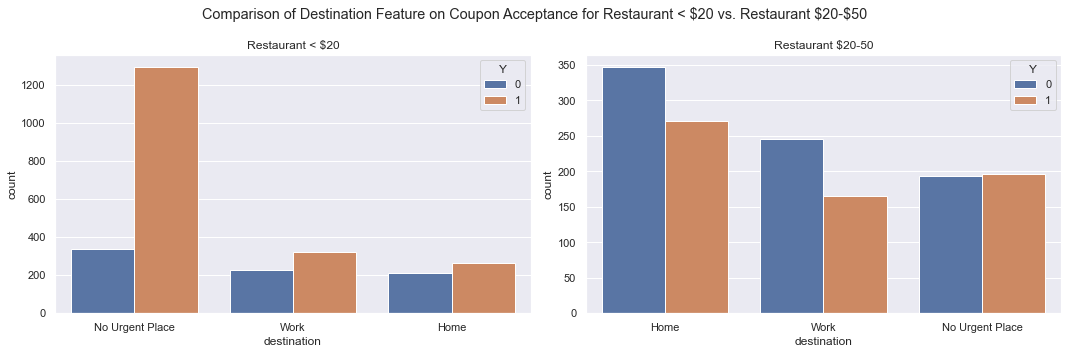

In [330]:
fig, ax =plt.subplots(1,2, sharex = False, figsize=(15,5))
sns.countplot(data = df, x='destination', ax=ax[0], hue = 'Y')
sns.countplot(data = df2, x ='destination', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Destination Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
plt.show()

Destination | No Urgernt Place & Home: The Restaurant < $20 coupon accepetance count is nearly 4 times that of the no acceptance count in the "No Urgent Place" category. However, the Restaurant $20-50 coupon acceptance and no acceptance counts are nearly equivalent for the same category. Furthermore, the highest acceptance count for the Restaurant $20-50 coupon is in the "Home" category but the value is surpassed by the no acceptance count. The "Work" category no acceptance count is also markedly higher.

Recommendation: Restaurants < $20 should send their coupons outside of morning and afternoon rush hour. Restaurants $20-50 should send their coupons during afternoon rush hour. 

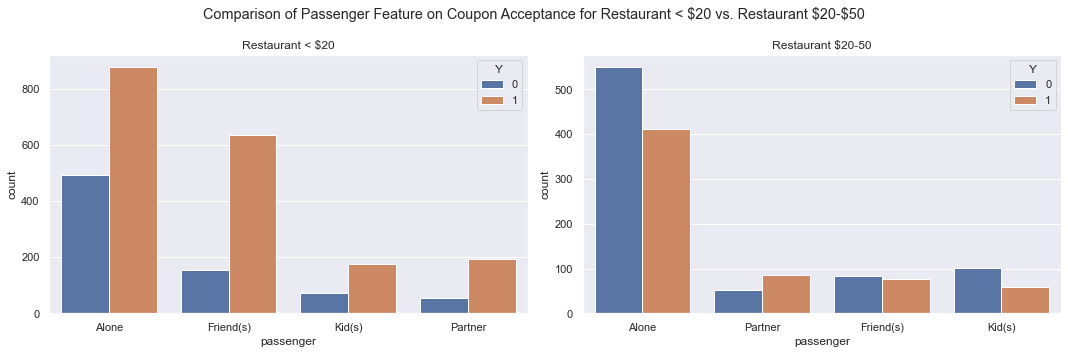

In [336]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
sns.countplot(data = df, x='passenger', ax=ax[0], hue = 'Y')
sns.countplot(data = df2, x ='passenger', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Passenger Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
plt.show()

Passenger | Alone & Friend: The Restaurant < $20 coupon acceptace count for 'Alone & Friend' are markedly higher than the no acceptance count. However, the Restaurant $20-50 coupon acceptance count is lower in both aformentioned categories but markedly so in the 'Friend' category. The highest acceptance count for both coupons is in the 'Alone' category.

Recommendation: Coupons for Restaurants < $20 & $20-50 should be sent during lunch breaks when people tend to eat by themselves. 

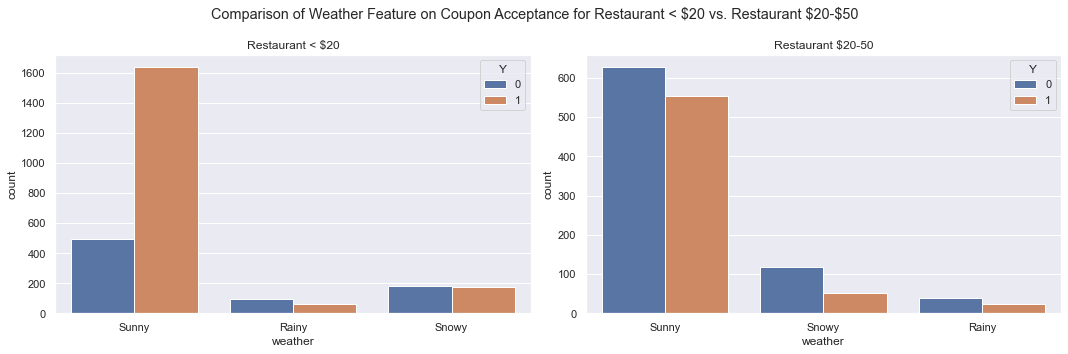

In [325]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
sns.countplot(data = df, x='weather', ax=ax[0], hue = 'Y')
sns.countplot(data = df2, x ='weather', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Weather Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
plt.show()

Weather | Sunny: Both coupons have the highest acceptance count in the "Sunny" catgory and very low acceptance rates during snowy and rainy weather.

Recommendation: Only send coupons during sunny weather.

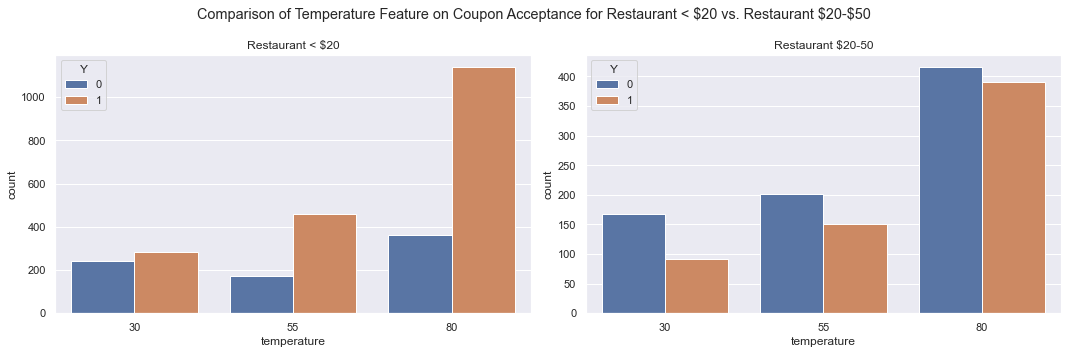

In [326]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
sns.countplot(data = df, x='temperature', ax=ax[0], hue = 'Y')
sns.countplot(data = df2, x ='temperature', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Temperature Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
plt.show()

Temperature | 80F: Both coupons have their highest acceptance count during 80F, followed by 55F, followed by 30F. However, the effect is most pronounced at 80F.

Recommendation: Both coupons should be sent when temperatures approximate 80F

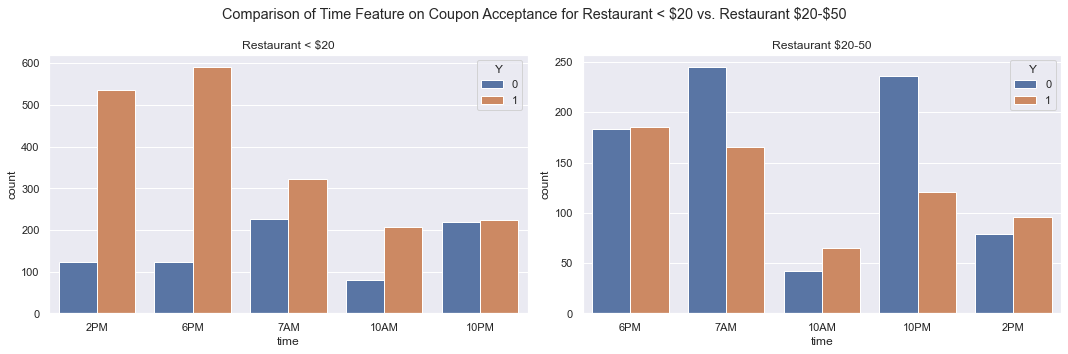

In [337]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
sns.countplot(data = df, x='time', ax=ax[0], hue = 'Y')
sns.countplot(data = df2, x ='time', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Time Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
plt.show()

Time | 7AM, 2PM, 6PM: Both coupons have their highest acceptance count at 6PM which reinforces previous findings. The Restaurant less than $20 has its second highest acceptance count at 2PM and the Restaurant $20-50 coupon has its second hightest count at 7AM, which is still lower than the Restaurant less than $20 coupon at the same time.

Recommendation: Send the Restaurant less than $20 coupon at 7AM, 2PM, & 6PM. Send the Restaurant $20-50 coupon at 7AM and 6PM.

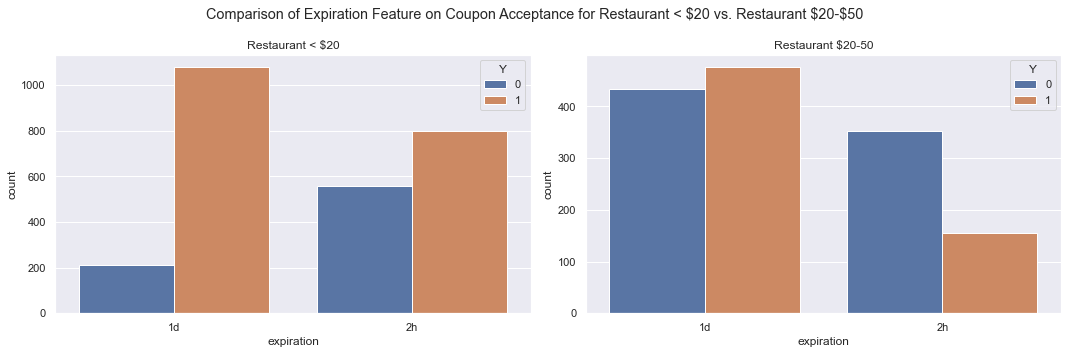

In [338]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
sns.countplot(data = df, x='expiration', ax=ax[0], hue = 'Y')
sns.countplot(data = df2, x ='expiration', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Expiration Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
plt.show()

Expiration | 1d & 2h: Both coupons have higher acceptance counts with expirations lasting 1 day. However, the Restaurant less than $20 coupon also has a high acceptance count with an expiration of 2 hours.

Recommendation: Both expirations work well for the Restaurant less than $20 coupon. The Restaurant $20-50 coupon should have an expiration of 1 day.

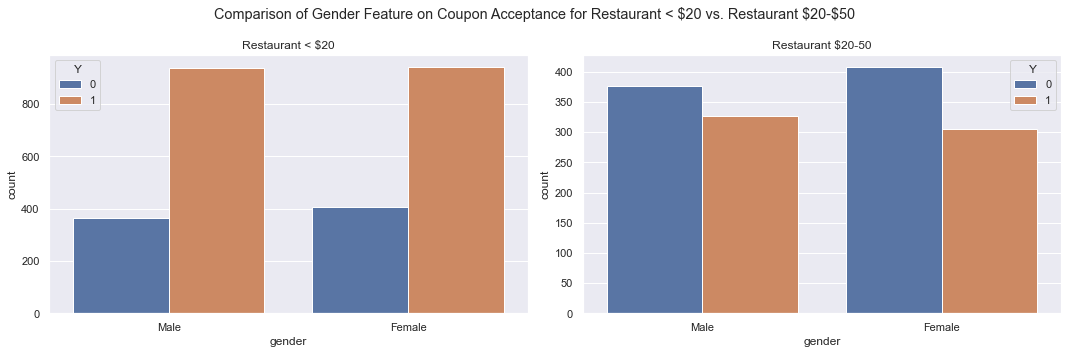

In [339]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
sns.countplot(data = df, x='gender', ax=ax[0], hue = 'Y')
sns.countplot(data = df2, x ='gender', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Gender Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
plt.show()

Gender: Males and females demonstrate equivalent acceptance counts for either coupon. However, in this data set there are much higher acceptance counts for the Restaurant <$20 coupon.

Recommendation: None.

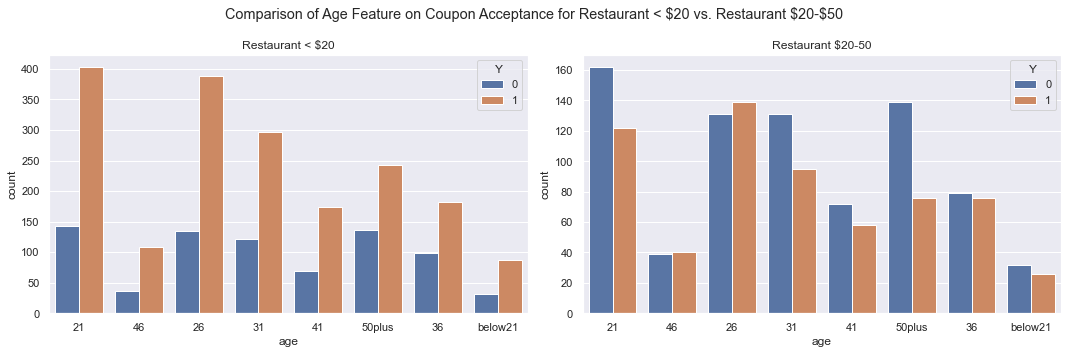

In [340]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
sns.countplot(data = df, x='age', ax=ax[0], hue = 'Y')
sns.countplot(data = df2, x ='age', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Age Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
plt.show()

Age | 21, 26, 31: Both coupons have the highest acceptance counts in the 21, 26, and 31 age categories. However, the Restaurant less than $20 has a higher acceptance vs no acceptance count across all age categories. The alternative coupon only had a higher acceptance rate in the 26 and 46 age categories.

Recommendation: The Restaurant less than $20 is effective for all age categories. The Restaurant $20-50 coupon does well for the 26 and 46 age categories and less so for the 21 and 31 age categories but can still generate significant acceptance counts.

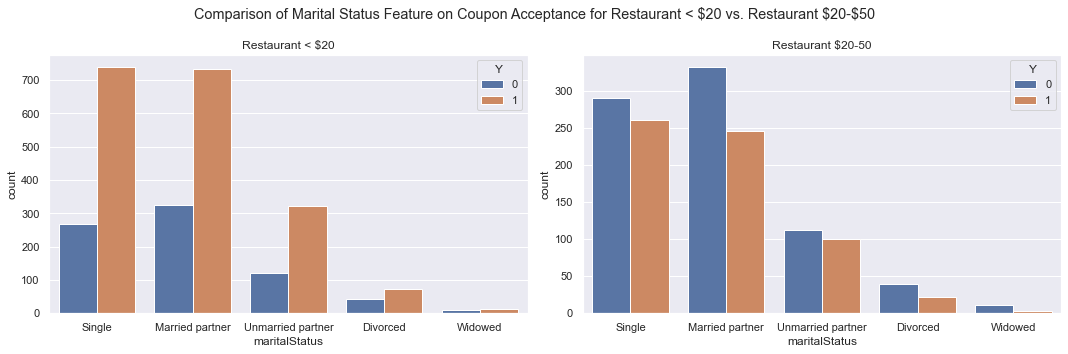

In [342]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
sns.countplot(data = df, x='maritalStatus', ax=ax[0], hue = 'Y')
sns.countplot(data = df2, x ='maritalStatus', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Marital Status Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
plt.show()

Marital Status | Single, Married partner, Unmarried partner: Both coupons have the highest acceptance counts in the Single, Married, and Unmarried partner categories. However, the Restaurant less than $20 has a higher acceptance vs no acceptance count across all maritalStatus groups whereas these same findings are reversed for the Restaurant $20-50 coupon but still generates significiant acceptance counts.

Recommendation: The Restaurant less than $20 is effective for all marital status categories. The Restaurant $20-50 coupon does well for the single and married partner categories and less so for the unmarried partner category but can still generate significant acceptance counts.

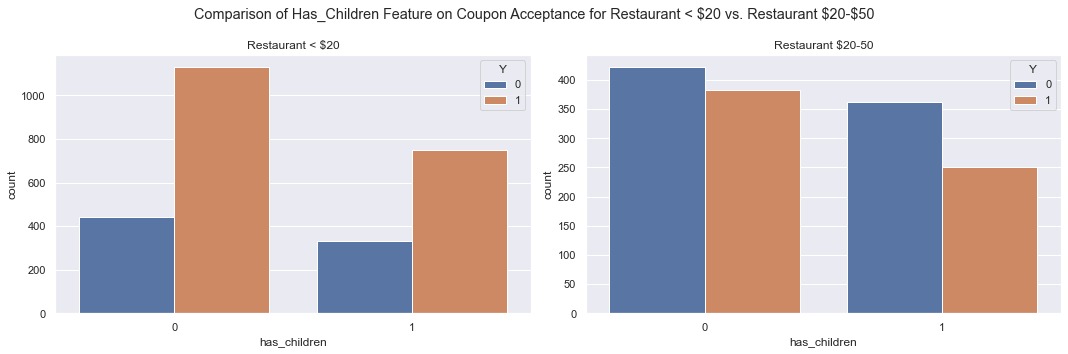

In [343]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
sns.countplot(data = df, x='has_children', ax=ax[0], hue = 'Y')
sns.countplot(data = df2, x ='has_children', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Has_Children Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
plt.show()

Has_Children: Having children or not demonstrates similar acceptance rates for either coupon. However, in this data set there are much higher acceptance counts for the Restaurant <$20 coupon.

Recommendation: Both coupons can drive acceptance counts by focusing on drivers who don't have children. The effect is more pronounced for the Restaurant < $20 coupon.

<function matplotlib.pyplot.show(close=None, block=None)>

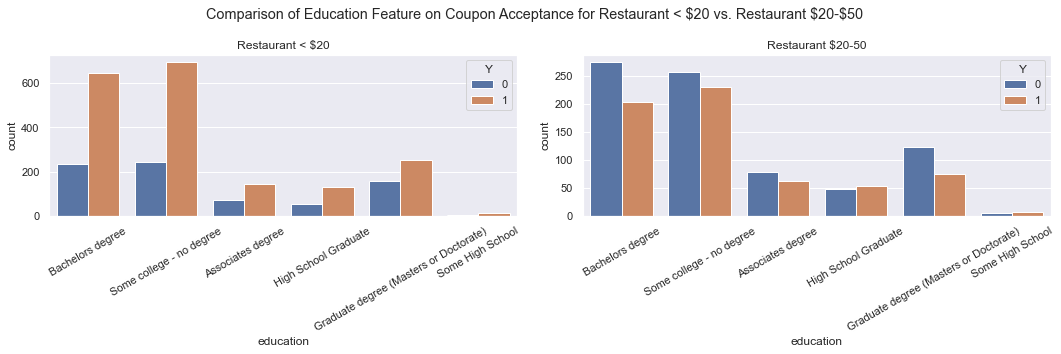

In [421]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
chart1 = sns.countplot(data = df, x='education', ax=ax[0], hue = 'Y')
chart2 = sns.countplot(data = df2, x ='education', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Education Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
chart1.set_xticklabels(
    chart1.get_xticklabels(), 
    rotation=30)
chart2.set_xticklabels(
    chart2.get_xticklabels(), 
    rotation=30)
plt.show

Education | Bachelors & Some College - no degree: Both coupons had their highest acceptance counts for the bachelors and some college categories. However, the acceptance vs no acceptance rate for the Restaurant<$20 is higher throughout all education categories. The acceptance rate for the Restaurant$20-50 is only higher in the high school graduate and some high school categories.

Recommendation:Both coupons should be sent to drivers with a bachelor degree or some college education.

Due to the high number of categories for the occupation feature, I had to perform two separate visualizations and not include a title to ensure that the x-axis remained readable. The first visualization is the Restaurant < $20 and the second visualizaton is the Restaurant $20-50. Please see below for my analysis.

<function matplotlib.pyplot.show(close=None, block=None)>

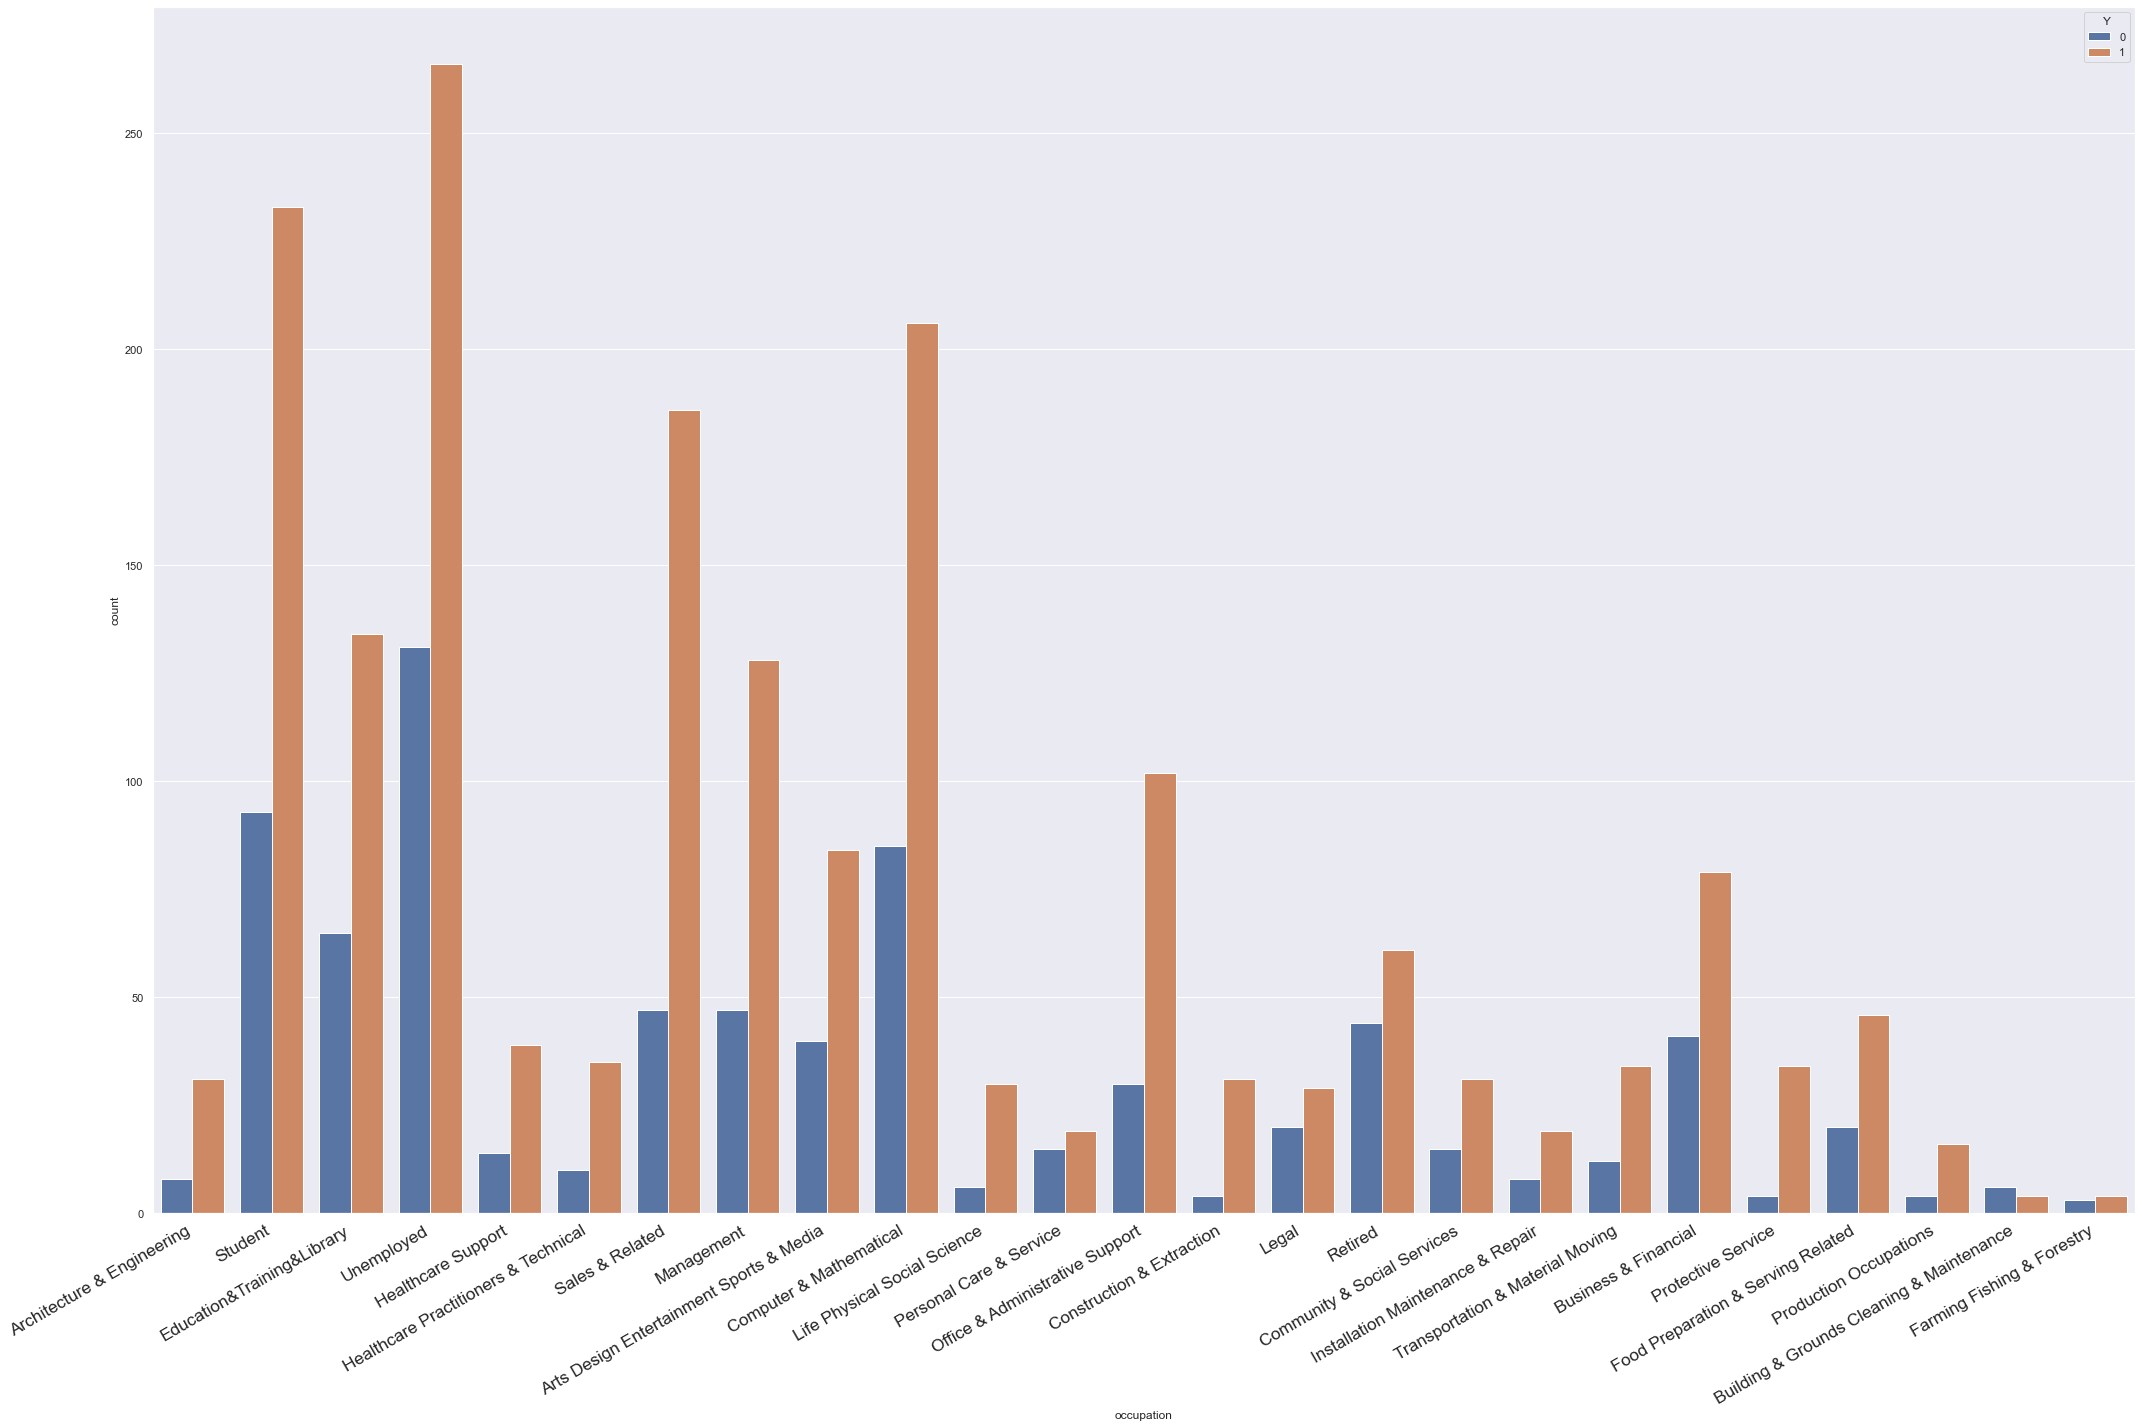

In [419]:
ax = sns.countplot(data=df, x='occupation', hue='Y')
sns.set(rc={'figure.figsize':(30,20)})
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=30,
    fontsize = 'x-large',
    horizontalalignment='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

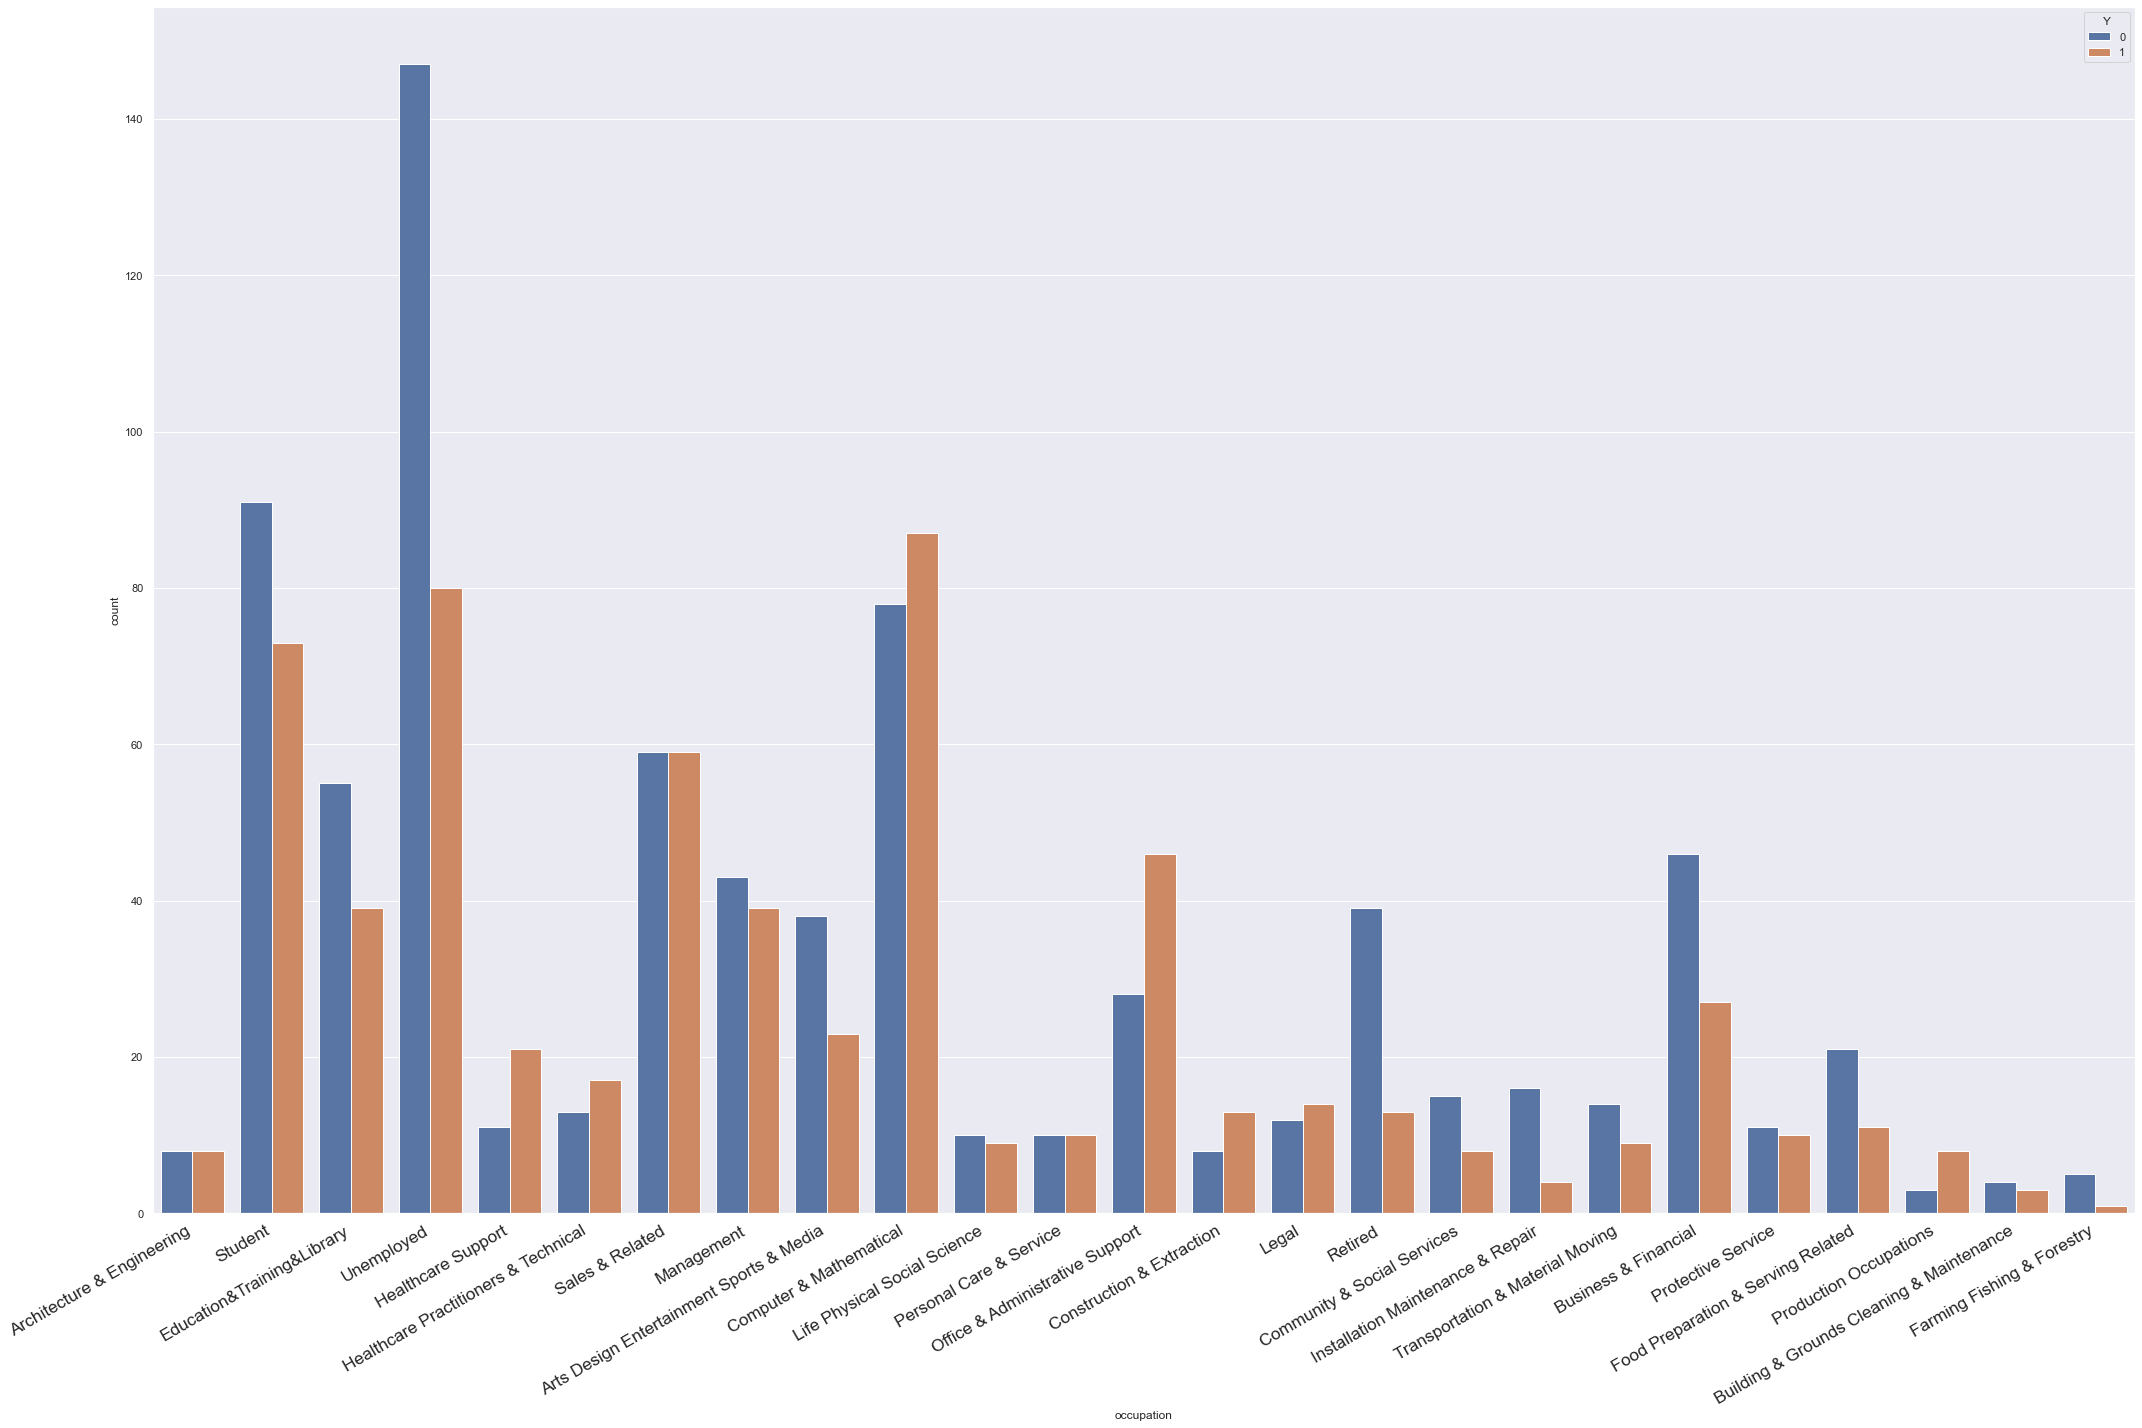

In [420]:
ax = sns.countplot(data=df2, x='occupation', hue='Y')
sns.set(rc={'figure.figsize':(30,20)})
ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=30,
    fontsize = 'x-large',
    horizontalalignment='right')
plt.show

Occupation | Student, Unemployed, Computer & Mathematical, Sales & Related: Interestingly, the four occupation categories that had the highest counts in both coupons are the same - Student, Unemployed, Computer & Mathematical, Sales & Related. The acceptance vs no acceptance rate for the Restaurant <$20 coupon is greater across all occupations with the exception of "building & grounds cleaning & maintenance category".

In regards to the Restaurant $20-50 coupon, this is the first time the data set has shown me numerous categories that have acceptance rates higher than no acceptance rates. These categories are specifically:

Healthcare Support
Healthcare Practioners & Technical
Sales & Related (appears to be equivalent but I will include it)
Computer & Mathemmatical
Personal Care & Service (appears to be equivalent but I include it)
Office & Administrative Support
Construction & Extraction
Legal
Production Occupations

Recommendation: For the Restaurant <$20 coupon focus on drivers who are students, unemployed, in the Computer & Mathematical or Sales & Related professions. For the Restaurant $20-50 focus on the same drivers as the other coupon and who work in the previously identified occupations above.

<function matplotlib.pyplot.show(close=None, block=None)>

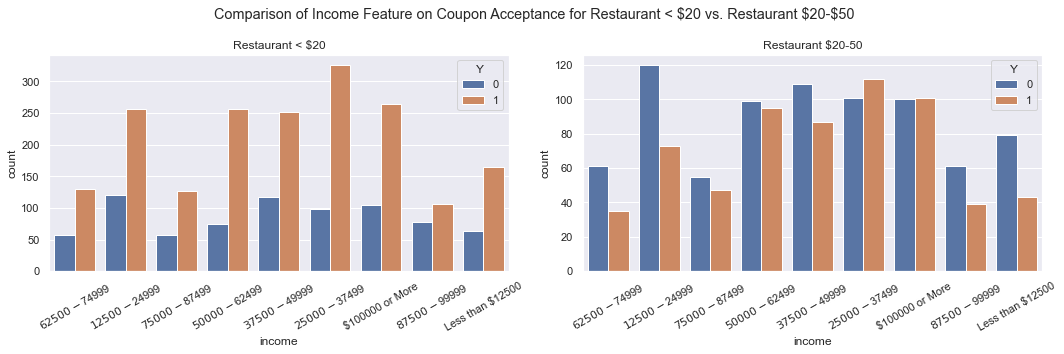

In [424]:
fig, ax =plt.subplots(1,2,sharex=False, figsize=(15,5))
chart1 = sns.countplot(data = df, x='income', ax=ax[0], hue = 'Y')
chart2 = sns.countplot(data = df2, x ='income', ax=ax[1], hue = 'Y')
fig.suptitle('Comparison of Income Feature on Coupon Acceptance for Restaurant < $20 vs. Restaurant $20-$50')
fig.axes[0].set_title('Restaurant < $20')
fig.axes[1].set_title('Restaurant $20-50')
chart1.set_xticklabels(
    chart1.get_xticklabels(), 
    rotation=30)
chart2.set_xticklabels(
    chart2.get_xticklabels(), 
    rotation=30)
plt.show

Income: The Restaurant < $20 coupon has a higher acceptance vs no acceptance rate accross all income categories. The Restaurant $20-50 coupon only has a higher acceptance vs no acceptance rate in the $25000-$37499 and the $100000 or more categories. Interestingly, both coupons had their highest and second highest acceptance counts in the $25000-$37499 and the more than $100000 category, respectively.

Recommendation: The Restaurant <$20 coupon performs well across all income categories. The Restaurant $20-50 coupon has the highest acceptance rate among drivers who are in the $25000-$37499 and the more than $100000 categories and still produces adequate acceptance counts in the $50000-$62499 and $37500-$49999 income categories.